## Stock Market Prediction

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import mplfinance as mpf
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

#### Function that returns a DataFrame from a CSV

In [36]:
PATH = '/home/johnadi/Desktop/projects/projects-from-yt-channel-derek-banas/python-for-finance/Stock List/'

In [31]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH +ticker + '.csv', index_col='Date', parse_dates=True)
    except FileNotFoundError:
        pass
    else:
        return df

#### Regression Analysis

Used to examine the relationship between two or more variables. We use it to see what factors matter and which do not. The dependent variable is what you want to better understand, while the independent variable affects the dependent. 

When analyzing stocks, the dependent variable is the price, while the independent may be the previous price fluctuations, season, economic events, earnings etc. 

<Axes: xlabel='eval', ylabel='beauty'>

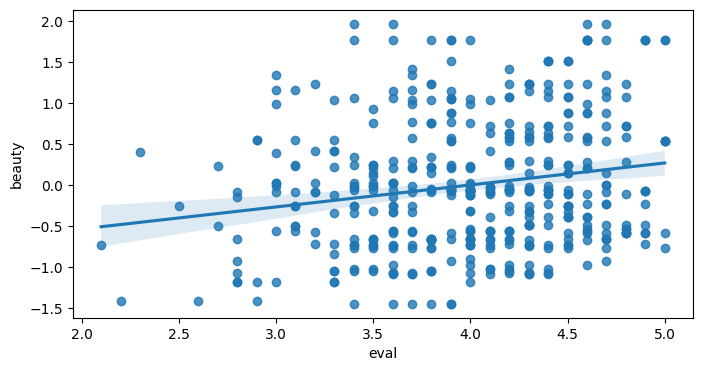

In [32]:
# This is a dataset that evaluates beauty and teacher evaluation
beauty = sm.datasets.get_rdataset("TeachingRatings", "AER")

# We are plotting a scatter plot with a regression line that estimates the mean of the results.
plt.figure(figsize=(8,4))
sns.regplot(x="eval", y="beauty", data=beauty.data)

# This plot is rather inconclusive


#### Tips Regression Line

In [33]:
# This time we analyze whether the total bill affects the tip people leave at restaurants 
# Load tip dataset
tips = sns.load_dataset("tips")
# Get column data in dataset
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<Axes: xlabel='total_bill', ylabel='tip'>

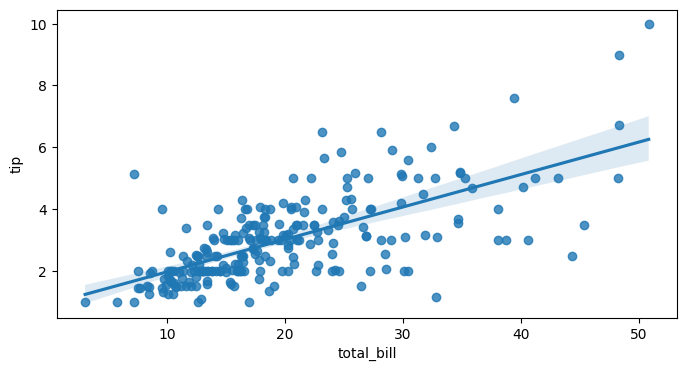

In [34]:
y = tips['total_bill']
x1 = tips['tip']

# Define the intercept to the y line
x = sm.add_constant(x1)

# OLS Ordinary Least Squares:
# Estimates a data so that a line can be drawn through data points
results = sm.OLS(y, x).fit()
results.summary()

plt.figure(figsize=(8,4))
sns.regplot(x="total_bill", y="tip", data=tips)

### Forecasting

You are going to choose different models depending upon the data you have. We will train our model on the first group of data. Then we test the model using the last part of our data. All along we are modeling using real known true results. We should forecast into the future the same length of time we test for. 

These forecasts are based off of the trends provided by the data you supply. Will it definitely happen? No, but it is more likely to continue on its current trend depending on how dramatic the slope is for the projection. If nothing dramatic occurs! But, as we know, dramatic things happen such as wars and pandemics. 

#### ARIMA model (Auto Regression)

AutoRegressive Integrated Moving Average (ARIMA) is the basis for many other models. It focuses on trying to fit the data as well as possible by examining the differences between values instead of the values themselves. 

ARIMA works well when data values have a clear trend and seasonality. We can only make predictions based on the data we have. Any outside effects not in the data can't be used to make predictions. For example, we can make predictions on the stock prices, but since we do not know when a recession may occur that event can't be modeled.

There is a seasonal (SARIMA) and a non-seasonal (ARIMA). There is also SARIMAX which focusses on exogenous or external factors. It differs from ARIMA in that it has a set of parameters (P, D and Q) that focus on seasonality. 

AR (AutoRegressions) refers to a model that regresses based on prior values. 

#### Regression Time Series Example with AutoReg

In [38]:
df = get_df_from_csv("GOOG")
df = df.asfreq('d')
df

,Adj Close,daily_return
Date,,
2017-01-03,39.306999,NaN
2017-01-04,39.345001,0.000967
2017-01-05,39.701000,0.009048
2017-01-06,40.307499,0.015277
2017-01-07,NaN,NaN
...,...,...
2021-08-14,NaN,NaN
2021-08-15,NaN,NaN
2021-08-16,138.916000,0.003685


In [39]:
df = df.fillna(method='ffill')
df

/tmp/ipykernel_3898/1384431736.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,Adj Close,daily_return
Date,,
2017-01-03,39.306999,NaN
2017-01-04,39.345001,0.000967
2017-01-05,39.701000,0.009048
2017-01-06,40.307499,0.015277
2017-01-07,40.307499,0.015277
...,...,...
2021-08-14,138.406006,0.000119
2021-08-15,138.406006,0.000119
2021-08-16,138.916000,0.003685


In [40]:
df = df.drop('daily_return', axis=1)
df

,Adj Close
Date,
2017-01-03,39.306999
2017-01-04,39.345001
2017-01-05,39.701000
2017-01-06,40.307499
2017-01-07,40.307499
...,...
2021-08-14,138.406006
2021-08-15,138.406006
2021-08-16,138.916000


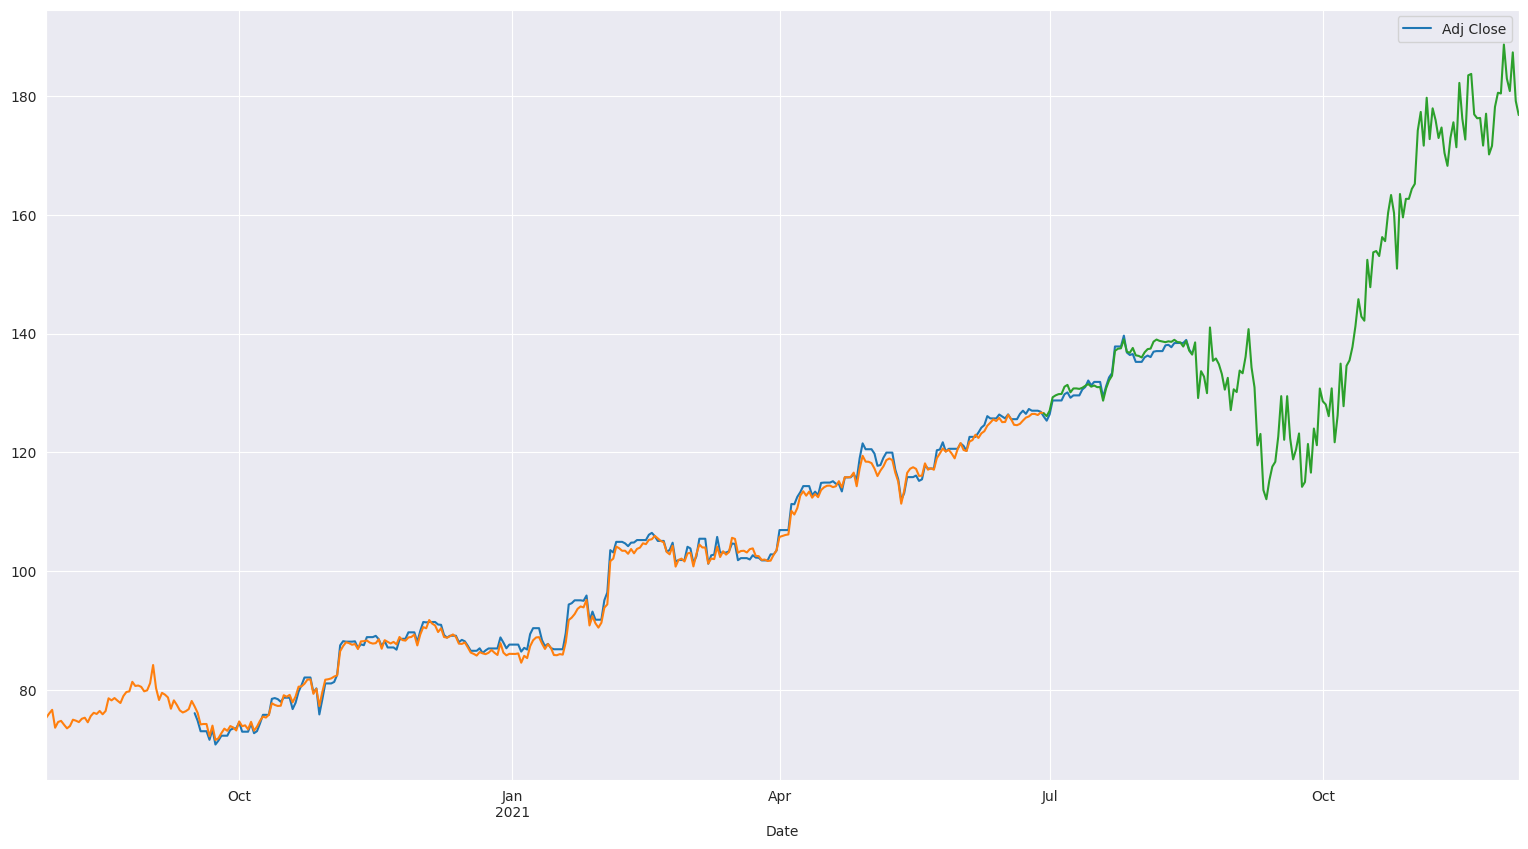

In [46]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(19,10))
fig, ax = plt.subplots()
lags = ar_select_order(df, maxlag=30)
model = AutoReg(df['Adj Close'], lags.ar_lags)
model_fit = model.fit()
train_df = df.iloc[50:1352]
test_df = df.iloc[1352:]
train_model = AutoReg(df['Adj Close'], 800).fit(cov_type="HC0")
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)

ax = test_df.plot(ax=ax)
ax = prediction.plot(ax=ax)

forecast = train_model.predict(start=end, end=end+160, dynamic=True)

ax = forecast.plot(ax=ax)